**STEP 1: Uploading Dataset to Google Colab**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving DSL-StrongPasswordData.csv to DSL-StrongPasswordData.csv


**STEP 2: Importing Required Important Libraries for ML Model**

In [2]:
!pip install cryptography
import pandas as pd
import numpy as np
from cryptography.fernet import Fernet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


**STEP 3: Loading the Dataset**

In [3]:
df = pd.read_csv("DSL-StrongPasswordData.csv")

df.head()


,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


**STEP 4: Setting up Feature Engineering (Extracting Timing Features)**

In [4]:
# Extract only the timing-related features
feature_cols = [col for col in df.columns if col.startswith(("H.", "DD.", "UD."))]
X = df[feature_cols]

# Convert subject to binary: subject 1 is real user, others are fake
df['label'] = (df['subject'] == 1).astype(int)
y = df['label']


**STEP 5: Training the Authentication ML Model**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Authentication Accuracy:", accuracy_score(y_test, y_pred))


Authentication Accuracy: 1.0


**STEP 6: Seting Up Encryption Functions**

In [6]:
from cryptography.fernet import Fernet

# Generate and initialize encryption key
key = Fernet.generate_key()
cipher = Fernet(key)

# Define encryption/decryption functions
def encrypt_message(message):
    return cipher.encrypt(message.encode()).decode()

def decrypt_message(encrypted_msg):
    return cipher.decrypt(encrypted_msg.encode()).decode()


**STEP 7: See Which Subjects Are Available**

In [7]:
df['subject'].value_counts()


,count
subject,
s002,400
s003,400
s004,400
s005,400
s007,400
s008,400
s010,400
s011,400
s012,400


**STEP 8: Filtering and Labeling the Data**

In [8]:
# Filter only two subjects
df_filtered = df[df['subject'].isin(['s027', 's028'])].copy()

# Label: 1 for s027 (real), 0 for s028 (fake)
df_filtered['label'] = (df_filtered['subject'] == 's027').astype(int)


**STEP 9: Selecting Timing Feature Columns**

In [12]:
# Get only timing-related features
feature_cols = [col for col in df_filtered.columns if col.startswith(("H.", "DD.", "UD."))]

# Drop rows with missing values (if any)
X = df_filtered[feature_cols].dropna()
y = df_filtered['label']

# Optional: confirm shape
print("Total Samples:", len(X))


Total Samples: 800


**STEP 10: Train-Test Split with Stratify**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


**STEP 11: Training the Model**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Authentication Accuracy:", accuracy_score(y_test, y_pred))


Authentication Accuracy: 1.0


**STEP 12: Test Real & Fake Users**   **(MAIN RESULTANT STEP)**

Simulation of Authentication & Encryption/Decryption Flow.

In [15]:
real_indices = y_test[y_test == 1].index
fake_indices = y_test[y_test == 0].index

sample_input_real = X_test.loc[[real_indices[0]]]
sample_input_fake = X_test.loc[[fake_indices[0]]]

# Real user test
auth_real = model.predict(sample_input_real)
print("\n===== REAL USER ATTEMPT =====")
if auth_real[0] == 1:
    print("User Authenticated. Proceeding to encrypt...\n")
    message = "This is a confidential message from the real user."
    encrypted = encrypt_message(message)
    print("Encrypted:", encrypted, "\n")
    decrypted = decrypt_message(encrypted)
    print("Decrypted:", decrypted)
else:
    print("Authentication Failed. Encryption blocked.")

# Fake user test
auth_fake = model.predict(sample_input_fake)
print("\n===== FAKE USER ATTEMPT =====")
if auth_fake[0] == 1:
    print("User Authenticated. Proceeding to encrypt...\n")
    message = "This is a fake user's message."
    encrypted = encrypt_message(message)
    print("Encrypted:", encrypted, "\n")
    decrypted = decrypt_message(encrypted)
    print("Decrypted:", decrypted)
else:
    print("Authentication Failed. Message encryption blocked.")



===== REAL USER ATTEMPT =====
User Authenticated. Proceeding to encrypt...

Encrypted: gAAAAABof41ZbG6EMkVUmRyLGQmbkPS585hW6ixaIxP1hS-2zrAGPpaymDqli3ErejmXyNNMNaIKU3-f1leajUqfjiVMccV4wzqPlnuQa62ZZWCrEvpYyHhKkKkh8pu46TIKUvOkDQir_URhIj-IfQXKjCDUPorukw== 

Decrypted: This is a confidential message from the real user.

===== FAKE USER ATTEMPT =====
Authentication Failed. Message encryption blocked.


**STEP 13: A Simple GUI User Form for encrypting and decrypting a message**

In [17]:
if auth_real[0] == 1:
    user_message = input("Enter a message to encrypt: ")
    encrypted = encrypt_message(user_message)
    print("Encrypted:", encrypted)
    print("Decrypted:", decrypt_message(encrypted))


Enter a message to encrypt: My world is big
Encrypted: gAAAAABof42IJsqTAgu0Qrt3BmyCrkUb5kx_W6xwnPHEgB_sUfOaukB0ErYC3Oz1VRvbt9aIuuSqJbA_b1IJyzsbPay1OTcyHg==
Decrypted: My world is big


**STEP 14: A Hashing Step for Integrity Check**

In [18]:
import hashlib

def generate_hash(message):
    return hashlib.sha256(message.encode()).hexdigest()

# Example usage
msg = "This is a secure message."
msg_hash = generate_hash(msg)
print("SHA-256 Hash:", msg_hash)


SHA-256 Hash: 71fb105ab3e5d388caa984f7f653297ca15dbd30ab74d41c8fa65ba893ac9113


**STEP 15: Confusion Matrix and Classification Report**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[115   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       125

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



**STEP 16: Export the Encrypted Message to a File and To decrypt from the file**

In [20]:
# Save encrypted message
with open("encrypted_message.txt", "w") as file:
    file.write(encrypted)


In [21]:
with open("encrypted_message.txt", "r") as file:
    encrypted_loaded = file.read()
    print("Decrypted from file:", decrypt_message(encrypted_loaded))


Decrypted from file: My world is big


**STEP 17: Plot Feature Importance from Random Forest**

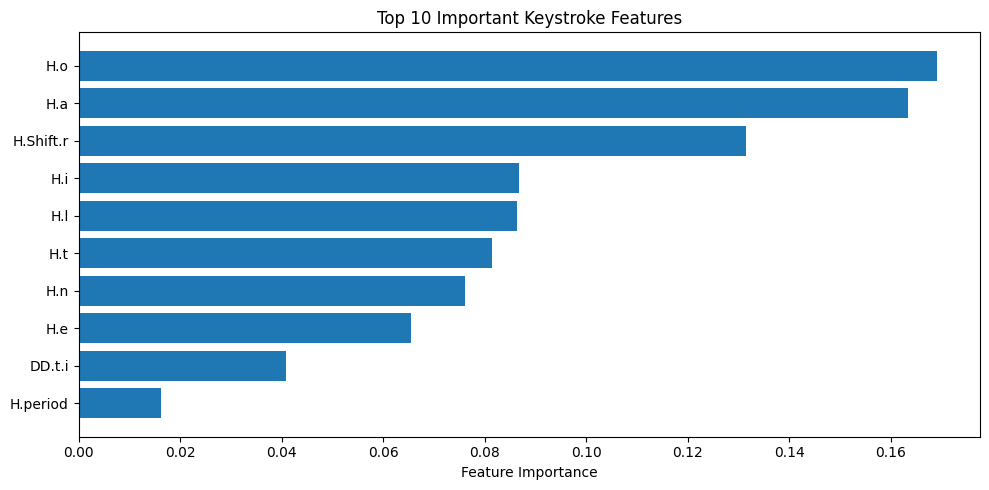

In [22]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10

plt.figure(figsize=(10, 5))
plt.title("Top 10 Important Keystroke Features")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


**STEP 18: Timestamp of Message (Optional Final Step)**

In [23]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Message sent at {timestamp}")


Message sent at 2025-07-22 13:10:15
